# Project: IMDB Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The goal of the project is to analyze the popularity of movies based on a set of data.
I used the Kaggle competition "Popular Movies of IMDb" (see https://www.kaggle.com/sankha1998/tmdb-top-10000-popular-movies-dataset) to retrieve necessary data.
Mainly to answer the following two questions:

#### Research Question 1: Which genres are most popular from year to year?
#### Research Question 2:  What kinds of properties are associated with movies that have high revenues?


----------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section I will load in the data, check for cleanliness, and then trim and clean dataset for analysis.

### General Properties

In [2]:
#load dataset
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

 I'm going to drop some attrtibute as they seem redundant or of no value for the analysis.
 Attributes such as, id, imdb_id, cast, homepage, director, tagline, keywords, overview, production_companies  , release_date 

### Data Cleaning (Extracting relevant data)

In [5]:
# Drop irrelevant columns
columns_to_drop = ['id', 'imdb_id', 'cast', 'homepage', 'director', 'production_companies',
                   'tagline', 'keywords', 'overview','release_date', 'budget_adj', 'revenue_adj']

df.drop(columns_to_drop, inplace=True, axis=1)


In [6]:
# renaming column 'original_title' to 'title'
df.rename(columns={'original_title': 'title'}, inplace=True)

In [7]:
df.columns

Index(['popularity', 'budget', 'revenue', 'title', 'runtime', 'genres',
       'vote_count', 'vote_average', 'release_year'],
      dtype='object')

In [8]:
df.shape

(10866, 9)

### Check for missing/NULL values

In [9]:
df.isna().sum()

popularity       0
budget           0
revenue          0
title            0
runtime          0
genres          23
vote_count       0
vote_average     0
release_year     0
dtype: int64

#### 'genres' column has NULL value. Let's filter them out.

In [10]:
df.dropna(subset=['genres'], how='any', inplace=True);

In [11]:
#let's check for missing values
df.isna().sum()

popularity      0
budget          0
revenue         0
title           0
runtime         0
genres          0
vote_count      0
vote_average    0
release_year    0
dtype: int64

In [12]:
df.head(5)

,popularity,budget,revenue,title,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015


In [13]:
#let's get all the genres in dataset
# replacing "|" with "," as str.cnontains won't detect "|" becasue its a key symbol used for OR.
df['genres'] = df['genres'].str.replace("|",",");

C:\Users\Azhar\miniconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
df.head()

,popularity,budget,revenue,title,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,"Action,Adventure,Science Fiction,Thriller",5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,"Action,Adventure,Science Fiction,Thriller",6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,119,"Adventure,Science Fiction,Thriller",2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,"Action,Adventure,Science Fiction,Fantasy",5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,137,"Action,Crime,Thriller",2947,7.3,2015


## Let's seprate multiple genres to single genre.
Splitting each row with multiple genre values into multiple rows having only one genre for each entry.

In [ ]:
data_frames = []
idx = 1
for col in df.columns:
    if col != 'genres':
        df_name = f'temp_{idx}'
        df_name = pd.DataFrame(df.genres.str.split(',').tolist(), index=df[col]).stack()
        df_name = df_name.reset_index([0, col])
        df_name.columns = [col, 'genres']
        idx+=1
        
    data_frames.append(df_name)

In [ ]:
new_df = pd.concat(data_frames, axis=1)
df_clean = new_df.T.drop_duplicates().T
df_clean.head()

In [ ]:
df_clean.dtypes

In [ ]:
df_clean=df_clean.astype({'popularity': 'float',
                          'budget':'float',
                          'revenue':'float',
                          'vote_average':'float',
                          'vote_count':'float'})
df_clean.dtypes

<a id='eda'></a>
## Exploratory Data Analysis

Now that I've trimmed and cleaned the data, Let's move on to exploration.

### Research Question 1: Which genres are most popular from year to year?

we only need release_year, genres, and popularity data to answer this question. Let's filter our data.

In [24]:
df_gen_pop = df[['release_year', 'genres','popularity']]
df_gen_pop.head()

,release_year,genres,popularity
0,2015,"Action,Adventure,Science Fiction,Thriller",32.985763
1,2015,"Action,Adventure,Science Fiction,Thriller",28.419936
2,2015,"Adventure,Science Fiction,Thriller",13.112507
3,2015,"Action,Adventure,Science Fiction,Fantasy",11.173104
4,2015,"Action,Crime,Thriller",9.335014


In [25]:
table= pd.pivot_table(df_gen_pop,index=['release_year'])

In [27]:
data_dict = {}
for year in table.index:
    data = df_gen_pop.query(f'release_year=={year}').query('popularity == popularity.max()').reset_index(drop=True)['genres']
    data_dict[year] = data

In [28]:
temp = pd.DataFrame.from_dict(data_dict, orient='index')
temp.head(10)

,0
1960,"Drama,Horror,Thriller"
1961,"Adventure,Animation,Comedy,Family"
1962,"Adventure,Action,Thriller"
1963,"Action,Thriller,Adventure"
1964,"Adventure,Action,Thriller"
1965,"Adventure,Action,Thriller"
1966,"Animation,Family,Comedy"
1967,"Family,Animation,Adventure"
1968,"Science Fiction,Mystery,Adventure"
1969,"Adventure,Action,Thriller"


### Research Question 2:  What kinds of properties are associated with movies that have high revenues?

- Let's look at the relationship between revenue and different factors/feature.
- We'll do a single variable analysis, looking at a single variable and how it affects the revenue.
- That will provide us with sufficient information to predict whether a movie is going to generate high revenues.

In [30]:
df.columns

Index(['popularity', 'budget', 'revenue', 'title', 'runtime', 'genres',
       'vote_count', 'vote_average', 'release_year'],
      dtype='object')

### Plotting each feature vs Revenue

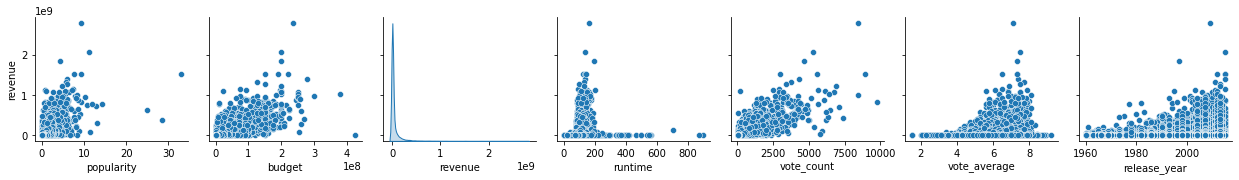

In [43]:
sns.pairplot(df, y_vars=['revenue'],  diag_kind="kde")


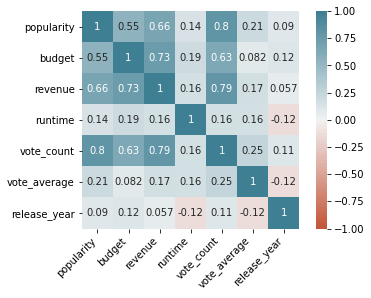

In [44]:
corr =df.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True,
                 cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45, horizontalalignment='right');

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!